# <h1><center>Demo 6</center></h1>

## Buffer Analysis


In [1]:
# Import Geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read Countries data
countries = gpd.read_file('data/countries.shp')
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
# Find the centroid. .centroid returns the centre of the feaure
country_centroids = countries.geometry.centroid
country_centroids.head()

/var/folders/3x/5jj60pms5ml09xsn32f0c4yr0000gn/T/ipykernel_75637/1943492236.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  country_centroids = countries.geometry.centroid


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

<Axes: >

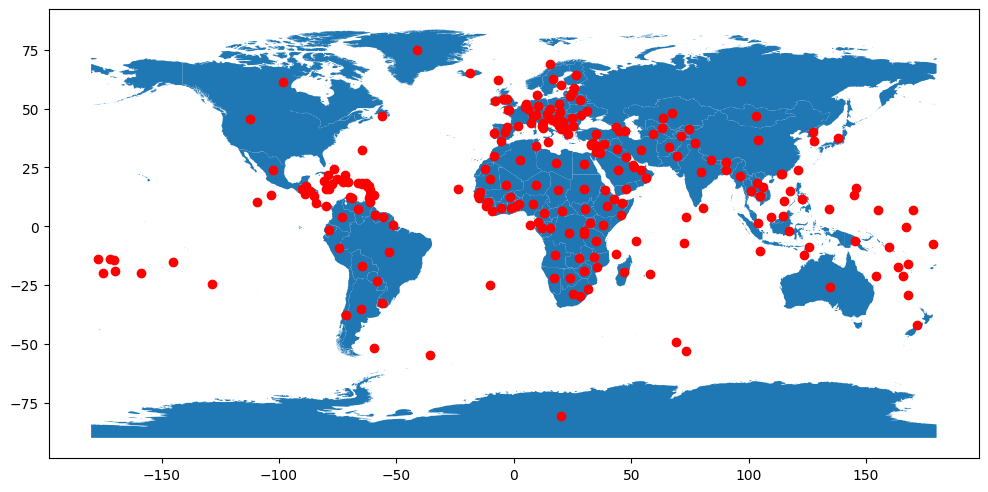

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red') 

<Axes: >

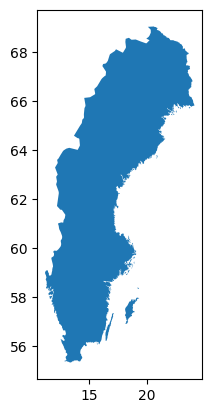

In [5]:
# Subset data to get only the country you
sweden = countries[countries['NAME'] == 'Sweden']
sweden.plot()

In [6]:
sweden.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
sweden_centroid = sweden.geometry.centroid
sweden_centroid

/var/folders/3x/5jj60pms5ml09xsn32f0c4yr0000gn/T/ipykernel_75637/956349430.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroid = sweden.geometry.centroid


54    POINT (16.75447 62.77710)
dtype: geometry

In [8]:
sweden_centroid.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

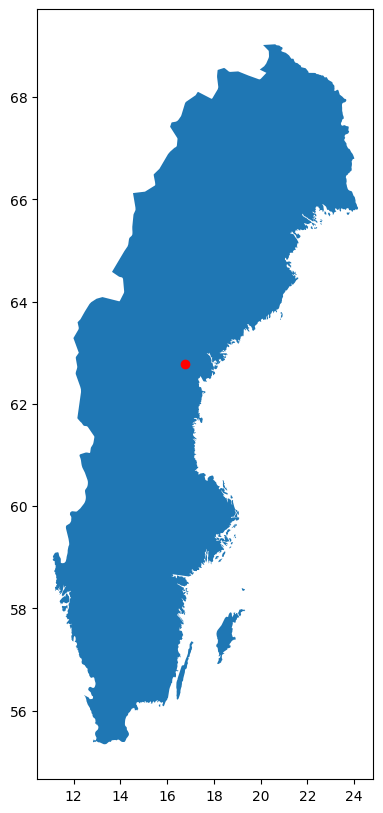

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
sweden.plot(ax=ax)
sweden_centroid.plot(ax=ax, color='red') 

/var/folders/3x/5jj60pms5ml09xsn32f0c4yr0000gn/T/ipykernel_75637/153031054.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroids_1degree = sweden_centroid.buffer(1)
/var/folders/3x/5jj60pms5ml09xsn32f0c4yr0000gn/T/ipykernel_75637/153031054.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sweden_centroids_2degree = sweden_centroid.buffer(2)


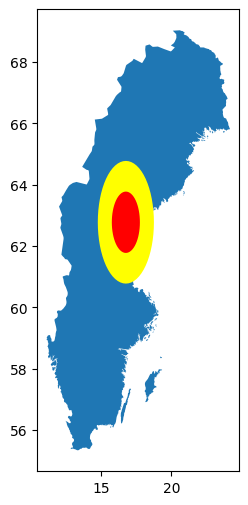

In [10]:
# Let us create a buffer of 1 & 2 degrees and plot them. .buffer() --> Calculates a circle buffer around the point. 
#.buffer() --> Calculates a circle buffer around the point and we can change a Point geometry into a polygon geometry.
sweden_centroids_1degree = sweden_centroid.buffer(1)
sweden_centroids_2degree = sweden_centroid.buffer(2)


fig, ax = plt.subplots(figsize=(8,6))
sweden.plot(ax=ax)
sweden_centroids_2degree.plot(ax=ax, color='yellow')
sweden_centroids_1degree.plot(ax=ax, color='red')
plt.show()



* Project to meter based Coordinate reference System 

In [12]:
sweden_centroid_projected = sweden_centroid.to_crs(epsg=3395)
sweden_projected = sweden.to_crs(epsg=3395)
sweden_centroid_projected.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

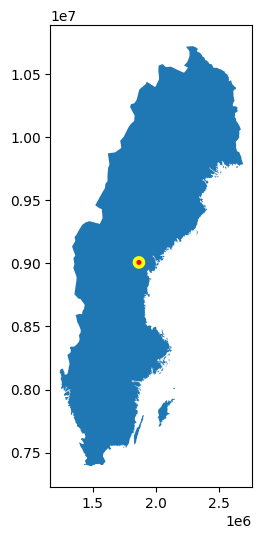

In [13]:
# Let us create a buffer of 20 km & 50 km and plot them
sweden_centroids_20km = sweden_centroid_projected.buffer(20000)
sweden_centroids_50km = sweden_centroid_projected.buffer(50000)

fig, ax = plt.subplots(figsize=(8,6))
sweden_projected.plot(ax=ax)
sweden_centroids_50km.plot(ax=ax, color='yellow')
sweden_centroids_20km.plot(ax=ax, color='red')

plt.show()